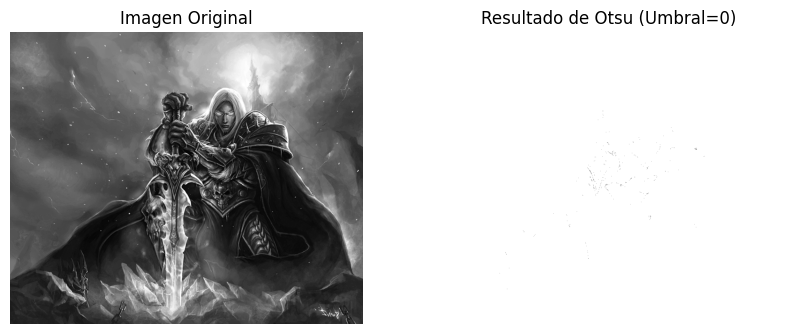

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('E:/arthas.jpg', cv2.IMREAD_GRAYSCALE)

# Paso 1: Calcular el histograma de la imagen
histogram, bins = np.histogram(image.flatten(), 256, [0,256])

# Paso 2: Normalizar el histograma
histogram_norm = histogram / float(image.shape[0] * image.shape[1])

# Paso 3: Inicializar la varianza total como cero
total_variance = 0

# Paso 4: Calcular la varianza interclase para cada posible umbral
for t in range(256):
    # Probabilidad acumulada de los píxeles en niveles de intensidad menores o iguales a t
    P_t = np.sum(histogram_norm[:t+1])
    
    # Media acumulada de los píxeles en niveles de intensidad menores o iguales a t
    mu_t = np.sum(np.arange(0, t+1) * histogram_norm[:t+1])
    
    # Media acumulada de los píxeles en niveles de intensidad mayores a t
    mu = np.sum(np.arange(t+1, 256) * histogram_norm[t+1:])
    
    # Varianza interclase para el umbral t
    sigma_inter = P_t * (1 - P_t) * (mu_t - mu)**2
    
    # Actualizar la varianza total
    total_variance += sigma_inter

# Paso 5: Seleccionar el umbral que maximiza la varianza interclase
optimal_threshold = np.argmax(total_variance)

# Paso 6: Aplicar el umbral seleccionado a la imagen
otsu_result = np.where(image > optimal_threshold, 255, 0)

# Mostrar la imagen original y el resultado de Otsu
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_result, cmap='gray')
plt.title('Resultado de Otsu (Umbral={})'.format(optimal_threshold))
plt.axis('off')

plt.show()
